## Análisis de las aplicaciones y sus conversiones

In [1]:
import pandas as pd
import numpy as np

installs_dtypes = {'ref_type': 'category', 'device_countrycode': 'category',
                   'device_brand': 'category', 'device_model' : 'category', 'session_user_agent': 'category',
                   'user_agent': 'category', 'kind': 'category', 'device_language': 'category'}

installs = pd.read_csv('installs.csv', dtype = installs_dtypes)

installs["created"] =  pd.to_datetime(installs["created"], errors = "coerce") #parseo de fechas

In [2]:
installs['cant_installs'] = 1

Text(0.5, 1.0, 'Las aplicaciones y su cantidad de instalaciones del 5 al 13 de Marzo')

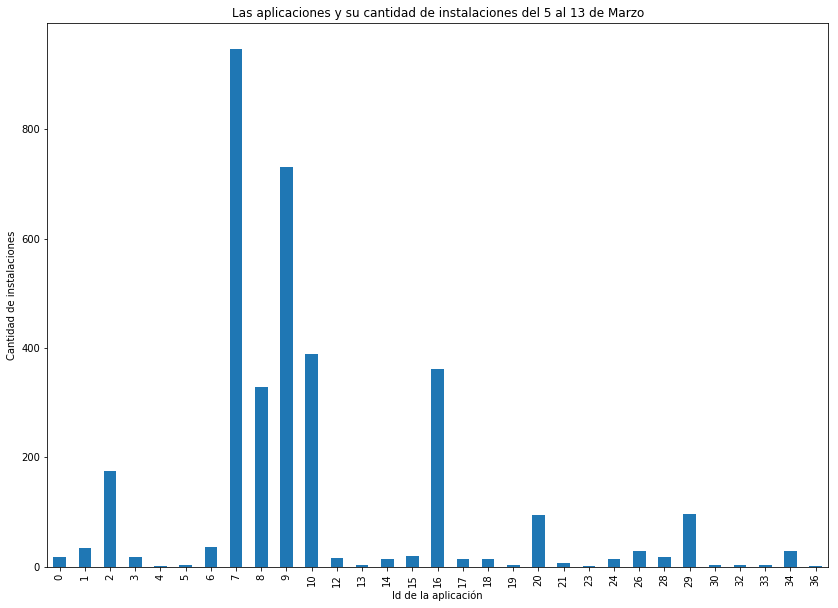

In [4]:
plot = installs.groupby('application_id').agg({'cant_installs': 'count'}).plot(kind = 'bar', figsize = (14,10), legend = False)
plot.set_ylabel("Cantidad de instalaciones")
plot.set_xlabel("Id de la aplicación")
plot.set_title("Las aplicaciones y su cantidad de instalaciones del 5 al 13 de Marzo")

### ¿Cuáles fueron las aplicaciones con más instalaciones por hora?

In [5]:
installs['hora'] = installs['created'].dt.hour

In [6]:
installs_group = installs.groupby(['hora','application_id']).agg({'cant_installs':'count'})

In [7]:
max_installs_hora = installs_group.sort_values(by = 'cant_installs', ascending = False).groupby(level = 0).head(1)\
.sort_values(by = 'hora', ascending = True).reset_index()

In [17]:
# imports
import plotly.graph_objs as go
import numpy as np
import pandas as pd

# Define bar properties
bar_heights = [10, 12, 15, 19, 25, 28, 31, 33, 43, 50, 64, 72, 88, 105]
bins = [0, 25, 40, 80, 200]
labels = ['Ugly', 'Bad', 'Good', 'Great']

colors = {'Ugly': 'red',
          'Bad': 'orange',
          'Good': 'lightgreen',
          'Great': 'darkgreen'}

# Build dataframe
df = pd.DataFrame({'y': bar_heights,
                   'x': range(len(bar_heights)),
                   'label': pd.cut(bar_heights, bins=bins, labels=labels)})
df.head()

,y,x,label
0,10,0,Ugly
1,12,1,Ugly
2,15,2,Ugly
3,19,3,Ugly
4,25,4,Ugly


In [ ]:
fig